# Lesson 1 Assignment - EnergyLoads
## Author - Michael Pearson

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set there some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 

#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.


import pandas as pd
import numpy as np

In [1]:
import pandas as pd 
import numpy as np

In [2]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"

I will now take a look at some of the data.

In [3]:
## Read the data
buildings_and_power = pd.read_csv(fileName)
buildings = pd.DataFrame(buildings_and_power)
print(buildings.head(10))
print(buildings.describe())


   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   
5                  0.90         563.5      318.5     122.50             7.0   
6                  0.90         563.5      318.5     122.50             7.0   
7                  0.90         563.5      318.5     122.50             7.0   
8                  0.86         588.0      294.0     147.00             7.0   
9                  0.86         588.0      294.0     147.00             7.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0            2           0.0                          0  

In [4]:
cols = ['Relative Compactness', 'Surface Area''Wall Area', 'Roof Area', 'Overall Height','Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
for column in cols: 
    ##buildings_and_power.loc[buildings_and_power[column] == '?', column] = np.nan
    buildings.dropna(axis = 0, inplace = True)
    continue

I will look at the shape and data types of the data. And in the cell below this I will add a counts column

In [5]:
print(buildings.shape)
print(buildings.dtypes)


(768, 10)
Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object


In [6]:
buildings['counts']=1

I will get a description of the data in each column

In [7]:
print(buildings.describe())

       Relative Compactness  Surface Area   Wall Area   Roof Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000              

The overall height is interesting, I want to see what that is

In [8]:
print(buildings[['counts', 'Overall Height']].groupby(['Overall Height']).agg('count'))

                counts
Overall Height        
3.5                384
7.0                384


Let's take a look at the heating and cooling loads.

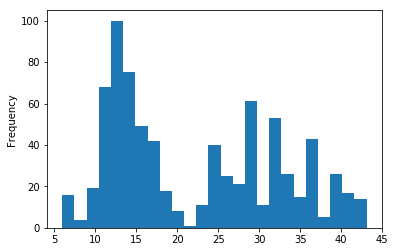

In [9]:
%matplotlib inline
buildings.loc[:, 'Heating Load'].plot.hist(bins = 25)

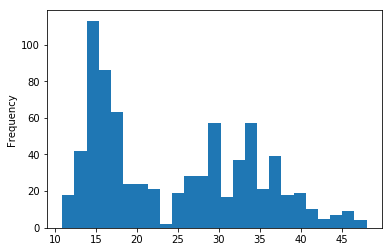

In [10]:
buildings.loc[:, 'Cooling Load'].plot.hist(bins = 25)

So we have a bimodal distribution

{'whiskers': [<matplotlib.lines.Line2D object at 0x121957cf8>, <matplotlib.lines.Line2D object at 0x121957fd0>], 'caps': [<matplotlib.lines.Line2D object at 0x1218a9358>, <matplotlib.lines.Line2D object at 0x1218a96a0>], 'boxes': [<matplotlib.lines.Line2D object at 0x121957ba8>], 'medians': [<matplotlib.lines.Line2D object at 0x1218a99e8>], 'fliers': [<matplotlib.lines.Line2D object at 0x1218a9d30>], 'means': []}


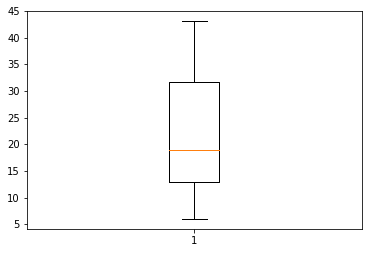

In [11]:
import matplotlib.pyplot as plt
print(plt.boxplot(buildings.loc[:,'Heating Load']))

I know that cooling and heating are related per the description of the data, but I'd like to see in what way. So I'll do a scatterplot. I like the seaborn package, so I'm going to use this most of the rest of the way through.

Text(16.200000000000017, 0.5, 'Heating Load')

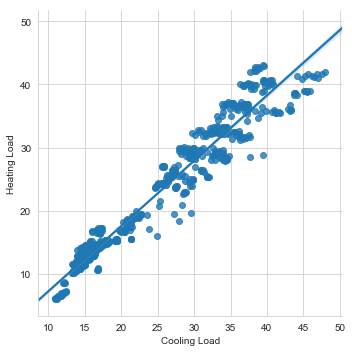

In [30]:
import seaborn as sns
sns.set_style("whitegrid")
sns.lmplot(x= "Cooling Load", y= "Heating Load", data= buildings)
ax.set_title('Heating versus Cooling') # Give the plot a main title
ax.set_xlabel('Cooling Load') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

I'd like to do a set of pairplots to see what can be seen in the data. Again, using the seaborn package.

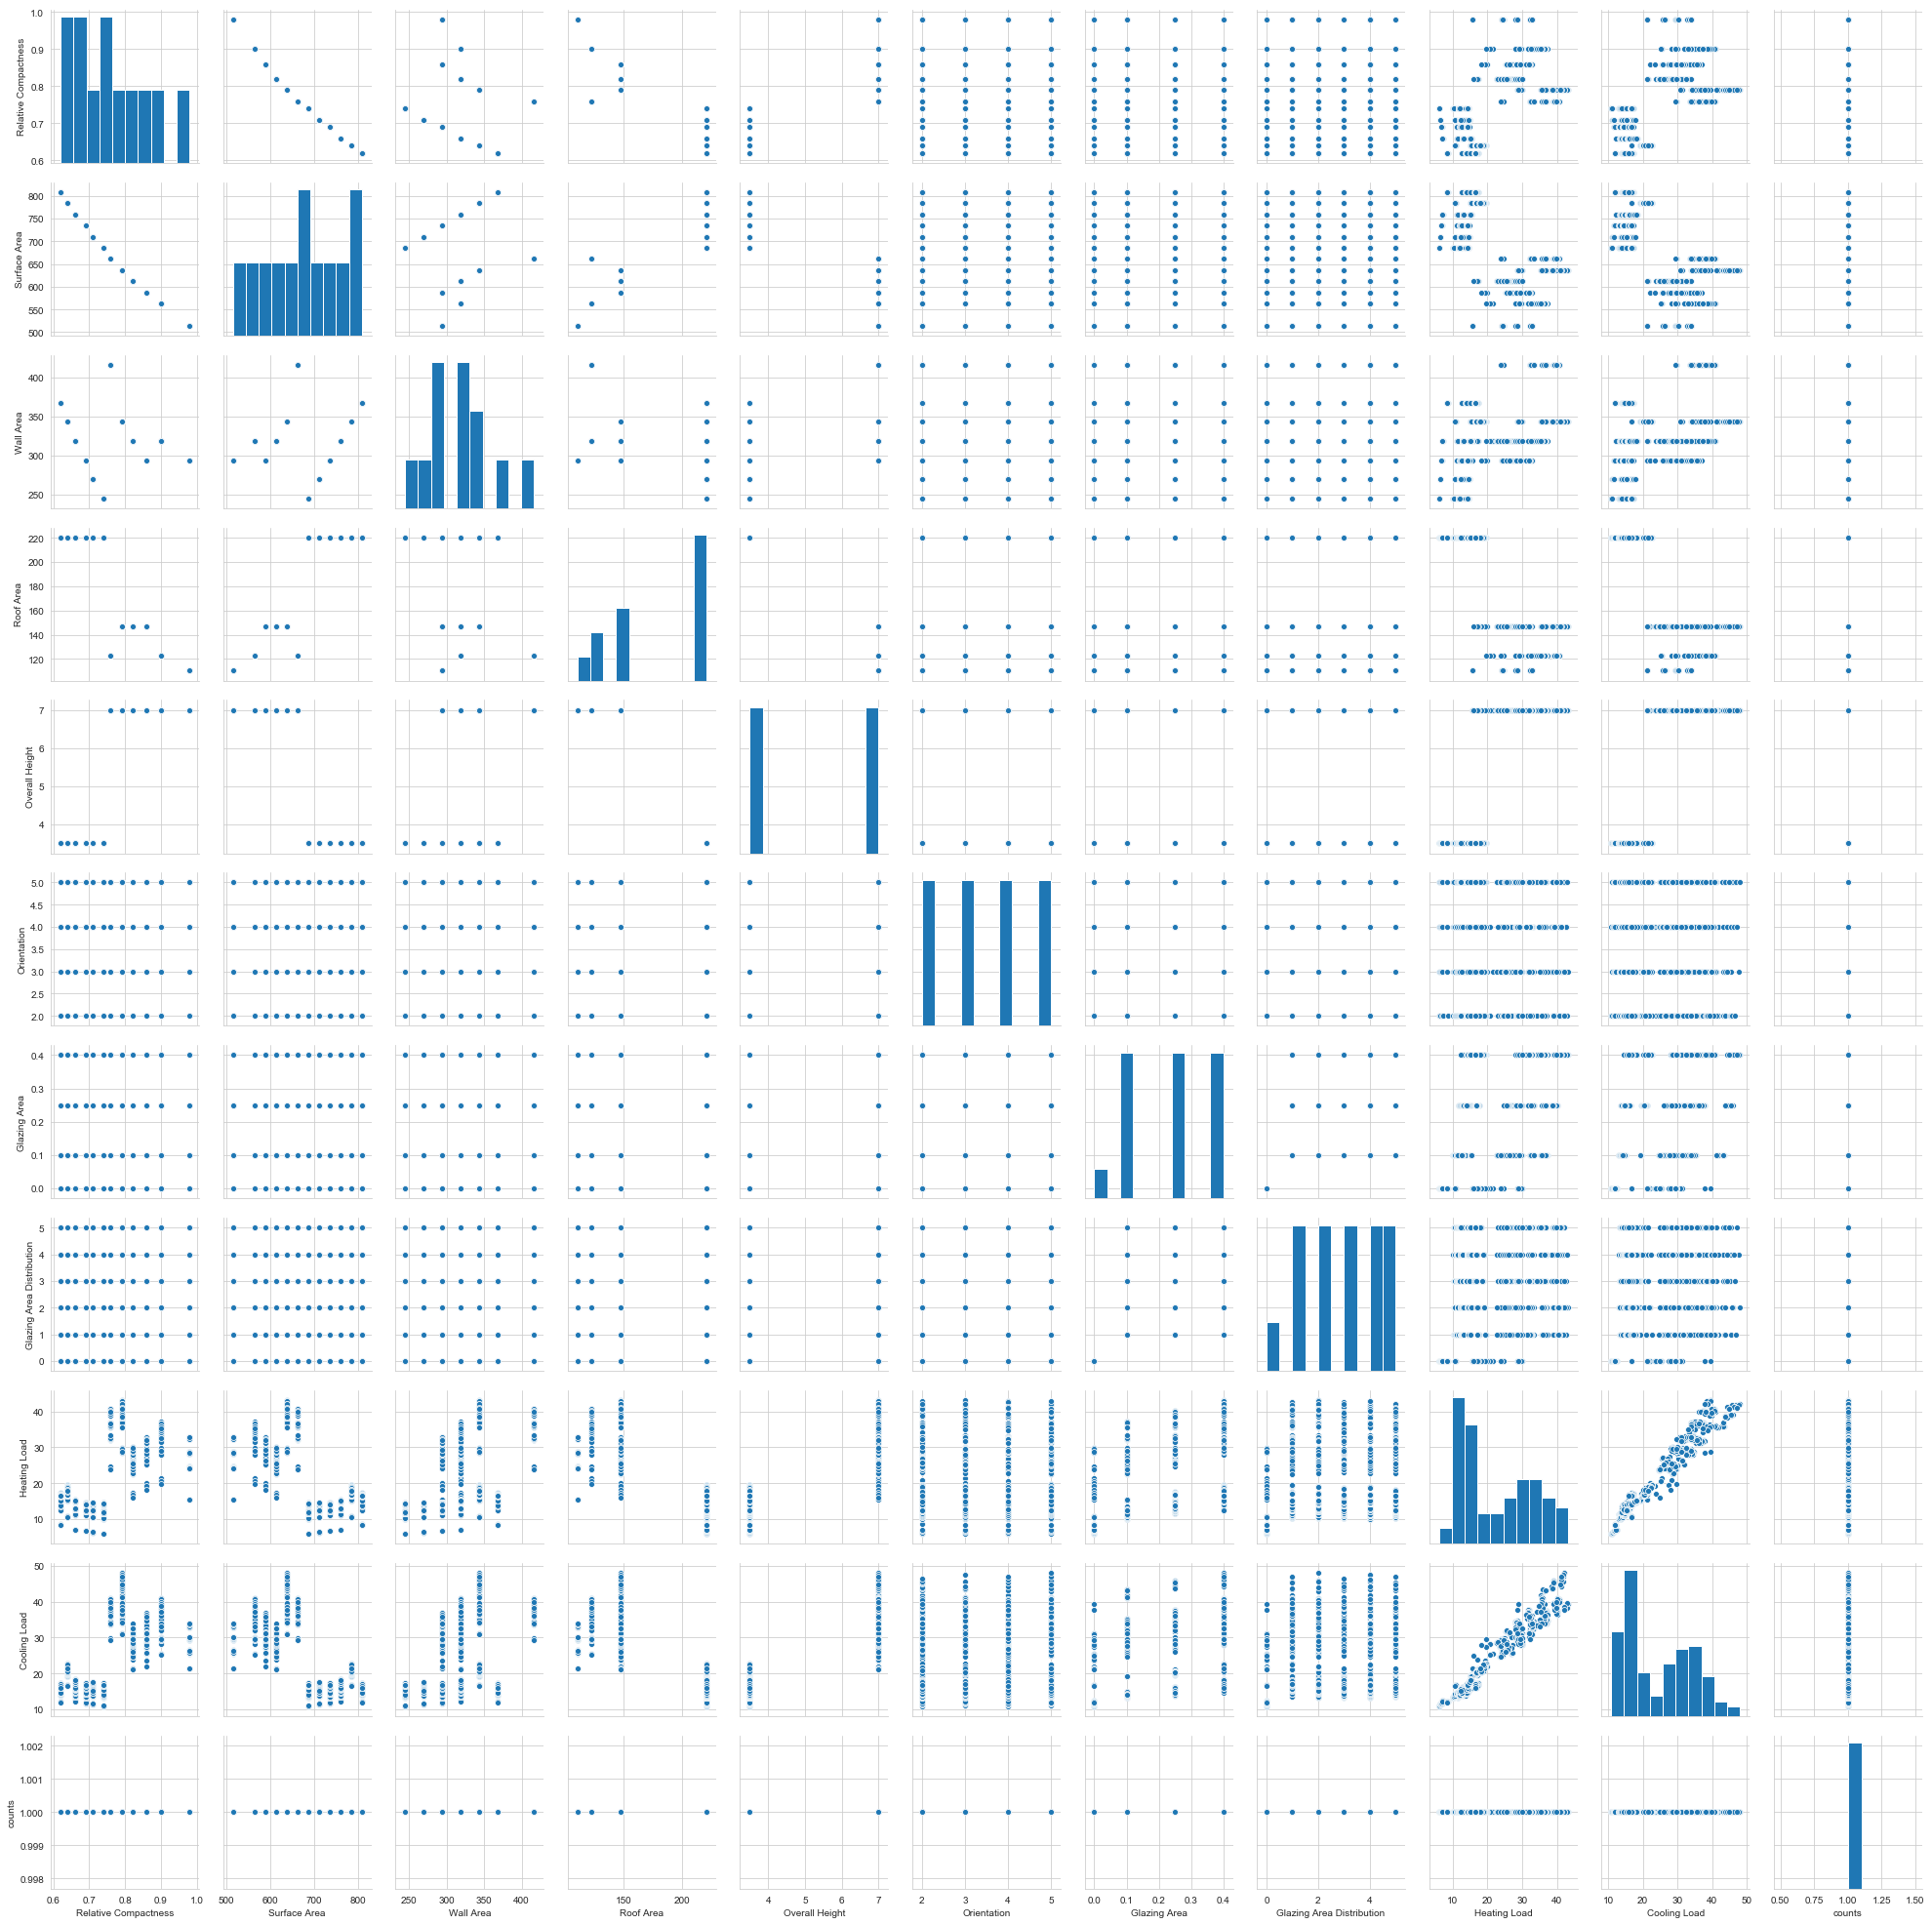

In [13]:
sns.pairplot(buildings)

Okay, I'd like to look at relative compactness, roof area, wall area, orientation and height

Text(0, 0.5, 'Heating Load')

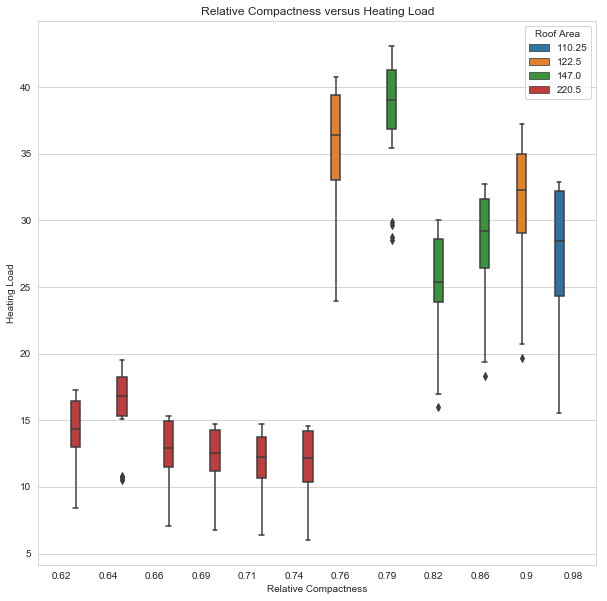

In [28]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Relative Compactness', y = 'Heating Load', hue = 'Roof Area', data = buildings, ax = ax)
ax.set_title('Relative Compactness versus Heating Load') # Give the plot a main title
ax.set_xlabel('Relative Compactness') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

This suggests that relative compactness has a big effect upon heating load, as does roof area.

Text(0, 0.5, 'Heating Load')

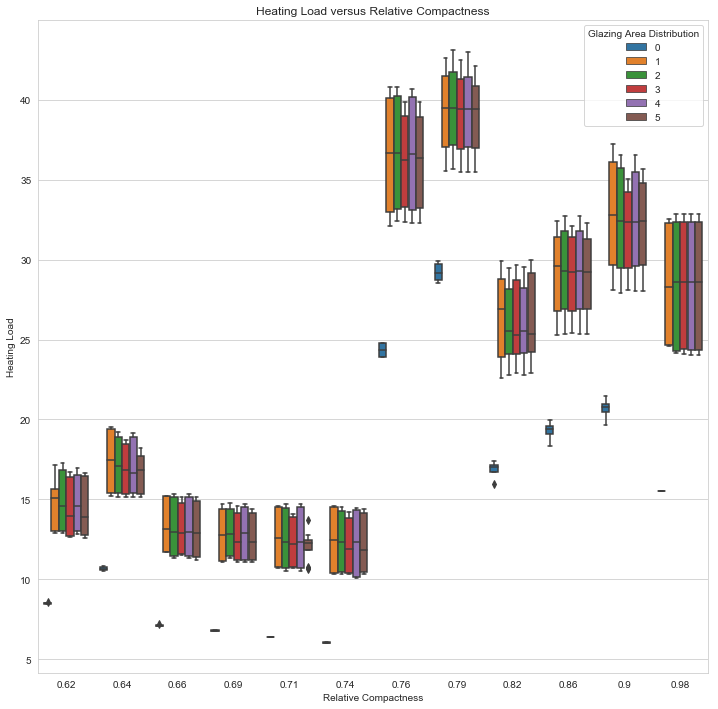

In [16]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Relative Compactness', y = 'Heating Load',hue = 'Glazing Area Distribution', data = buildings, ax = ax)
ax.set_title('Heating Load versus Relative Compactness') # Give the plot a main title
ax.set_xlabel('Relative Compactness') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis


And this suggest that glazing area distribution is not important. 

Text(0, 0.5, 'Heating Load')

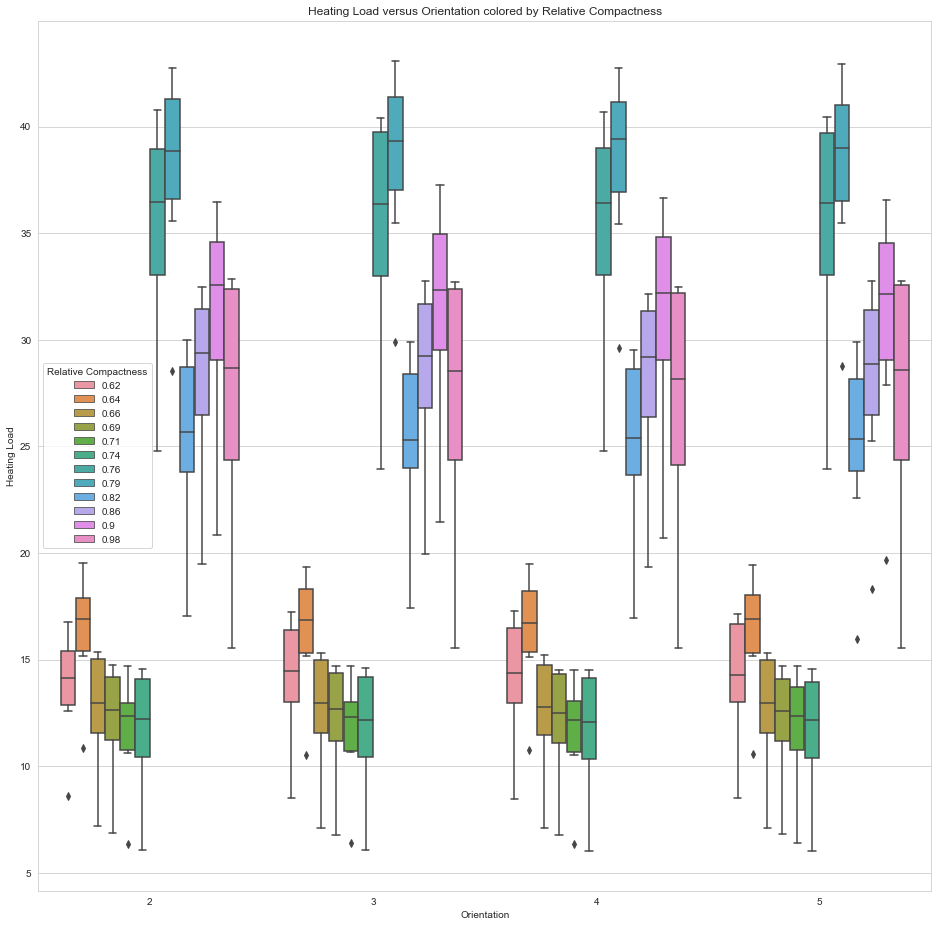

In [19]:
fig = plt.figure(figsize=(16,16)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Orientation', y = 'Heating Load', hue = 'Relative Compactness', data = buildings, ax = ax)
ax.set_title('Heating Load versus Orientation colored by Relative Compactness') # Give the plot a main title
ax.set_xlabel('Orientation') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

And this suggests that orientation is not important.

Text(0, 0.5, 'Heating Load')

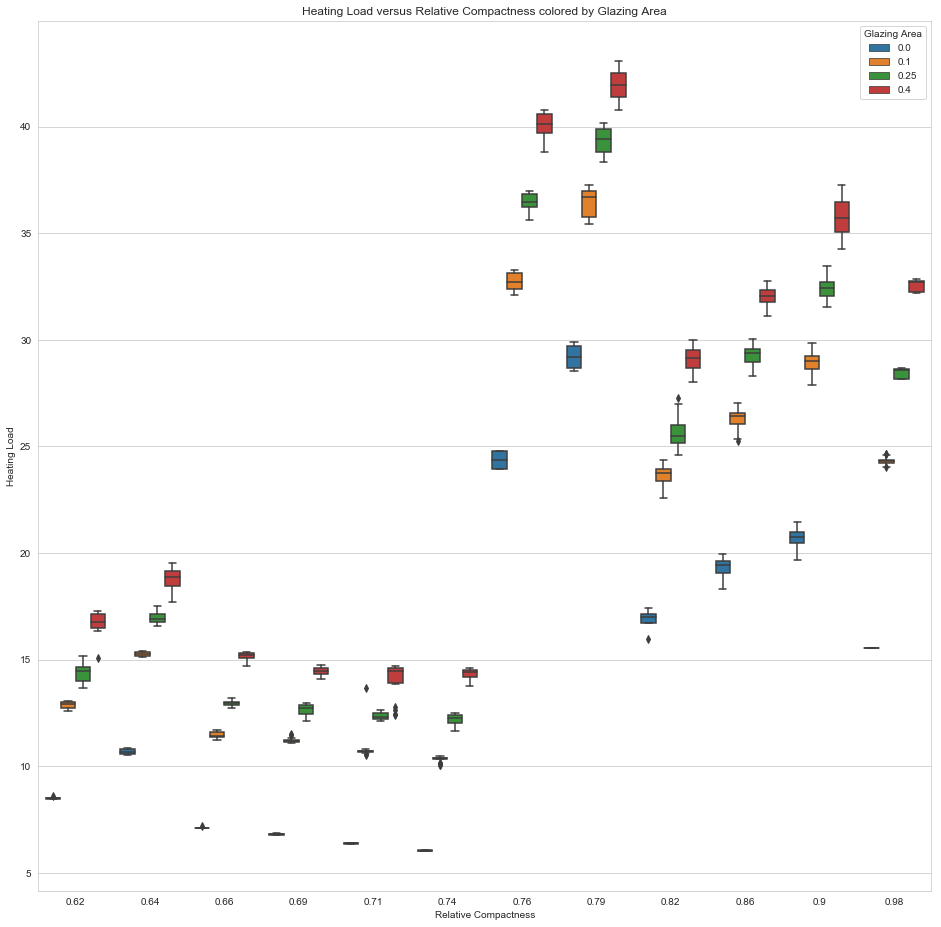

In [21]:
fig = plt.figure(figsize=(16,16)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Relative Compactness', y = 'Heating Load', hue = 'Glazing Area', data = buildings, ax = ax)
ax.set_title('Heating Load versus Relative Compactness colored by Glazing Area') # Give the plot a main title
ax.set_xlabel('Relative Compactness') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

Glazing area does have some effect - not as much as relative compactness

Text(0, 0.5, 'Heating Load')

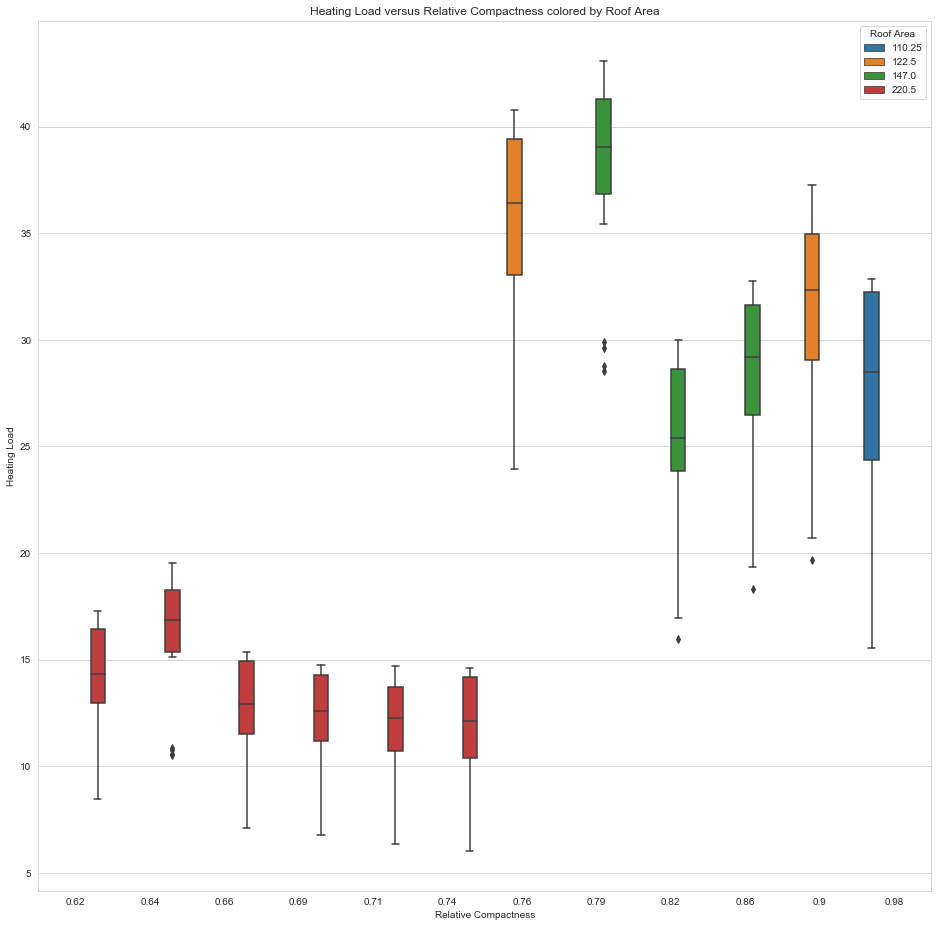

In [22]:
fig = plt.figure(figsize=(16,16)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Relative Compactness', y = 'Heating Load', hue = 'Roof Area', data = buildings, ax = ax)
ax.set_title('Heating Load versus Relative Compactness colored by Roof Area') # Give the plot a main title
ax.set_xlabel('Relative Compactness') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

Text(0, 0.5, 'Heating Load')

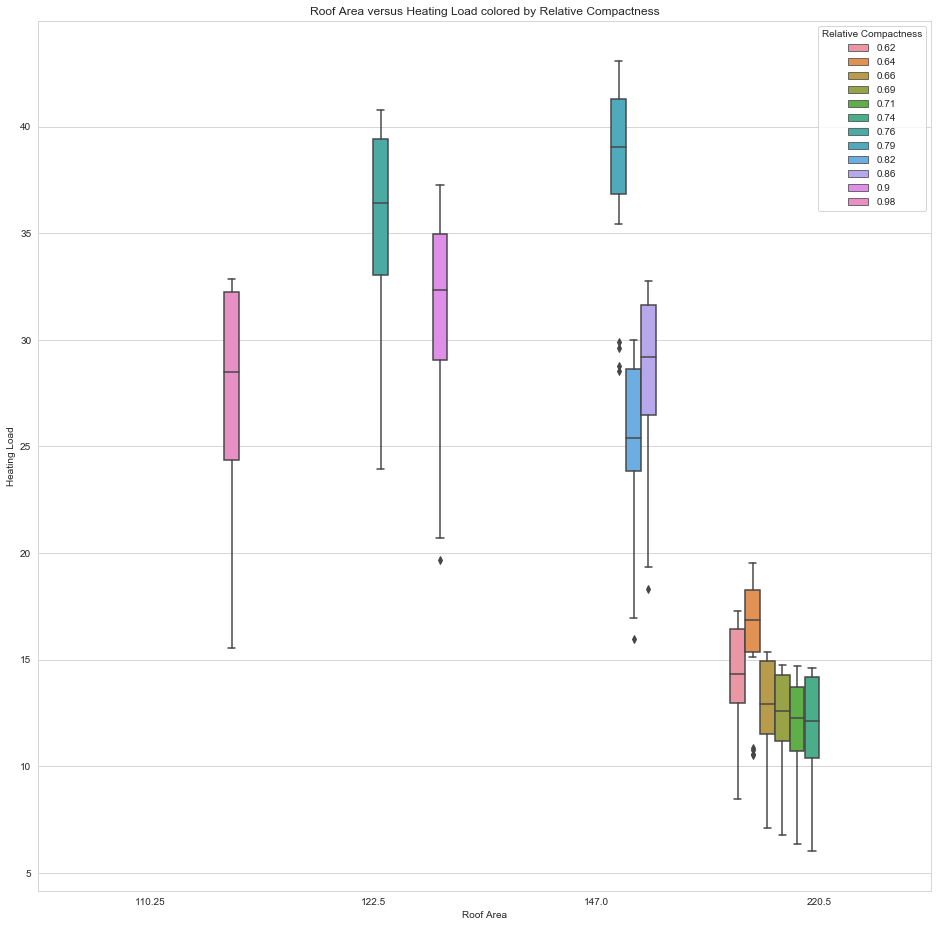

In [25]:
fig = plt.figure(figsize=(16,16)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Roof Area', y = 'Heating Load', hue = 'Relative Compactness', data = buildings, ax = ax)
ax.set_title('Roof Area versus Heating Load colored by Relative Compactness') # Give the plot a main title
ax.set_xlabel('Roof Area') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

This suggests that roof area is more important than relative compactness.

Text(0, 0.5, 'Density')

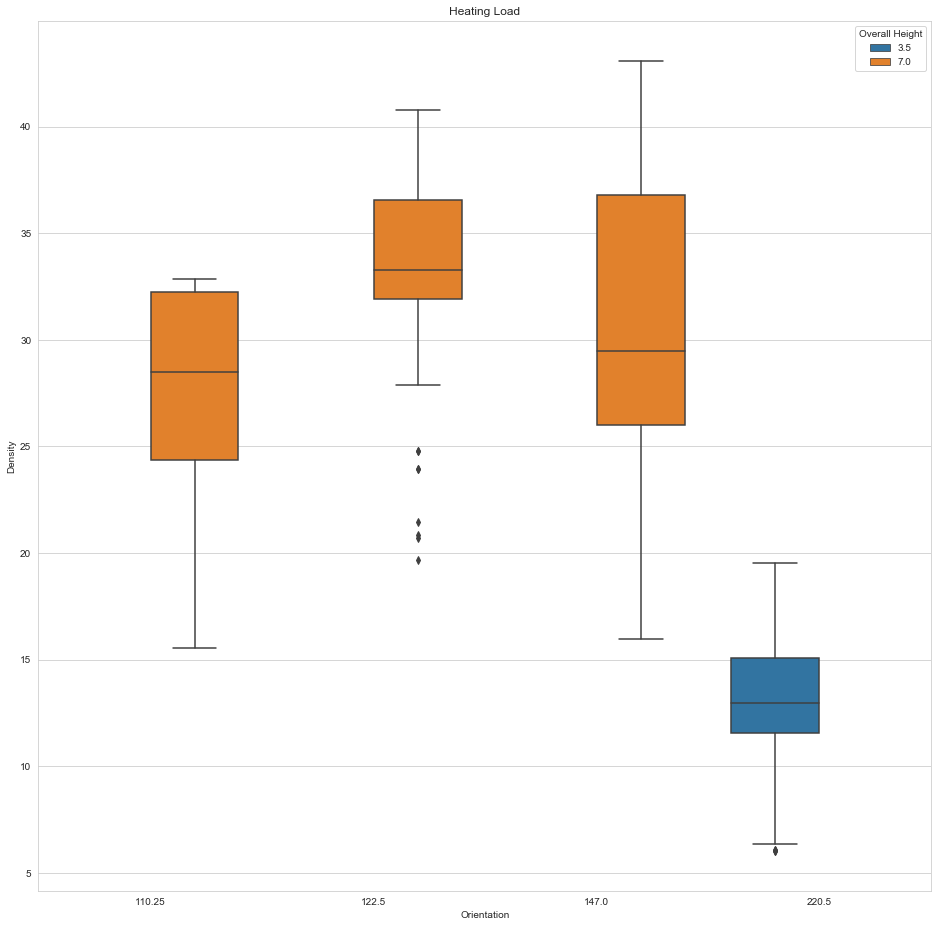

In [32]:
fig = plt.figure(figsize=(16,16)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Roof Area', y = 'Heating Load', hue = 'Overall Height' ,data = buildings, ax = ax)
ax.set_title('Heating Load versus Roof Area colored by overall height ') # Give the plot a main title
ax.set_xlabel('Orientation') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis


Text(0, 0.5, 'Heating Load')

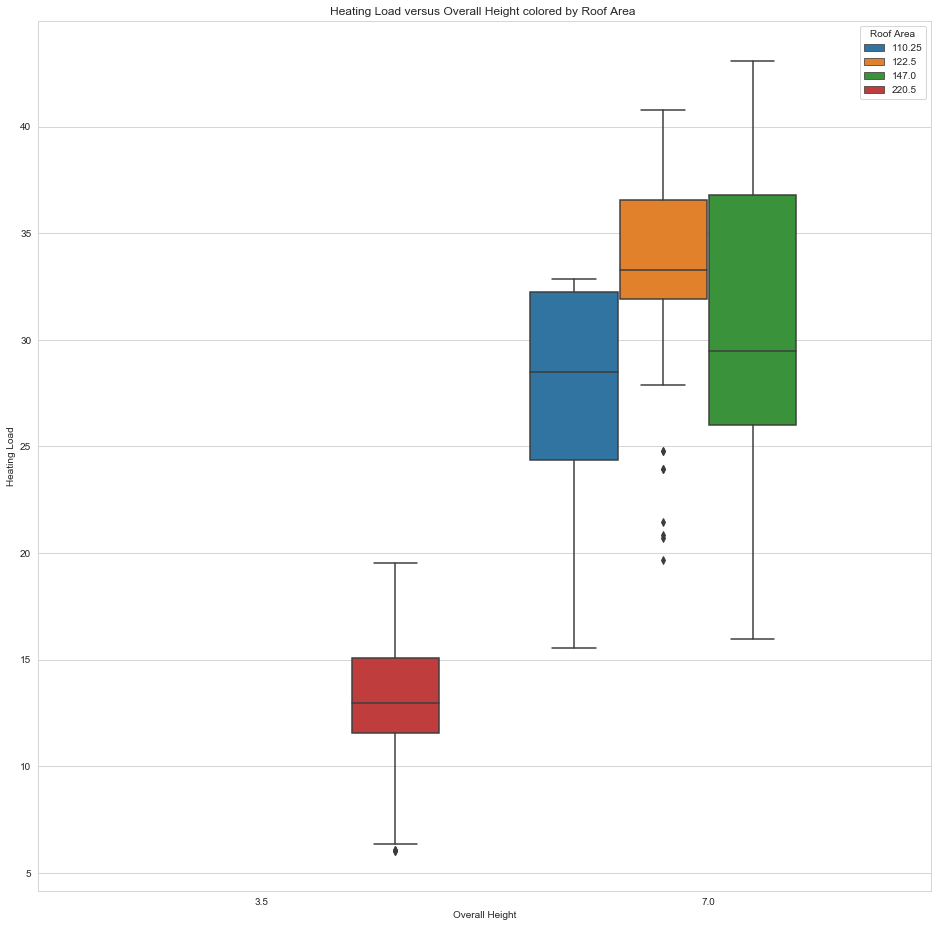

In [35]:
fig = plt.figure(figsize=(16,16)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Overall Height', y = 'Heating Load', hue = 'Roof Area' ,data = buildings, ax = ax)
ax.set_title('Heating Load versus Overall Height colored by Roof Area ') # Give the plot a main title
ax.set_xlabel('Overall Height') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis


This says that all of the 220.5 roof areas are at the 3.5 height - and that height is important.

Text(0, 0.5, 'Overall Height')

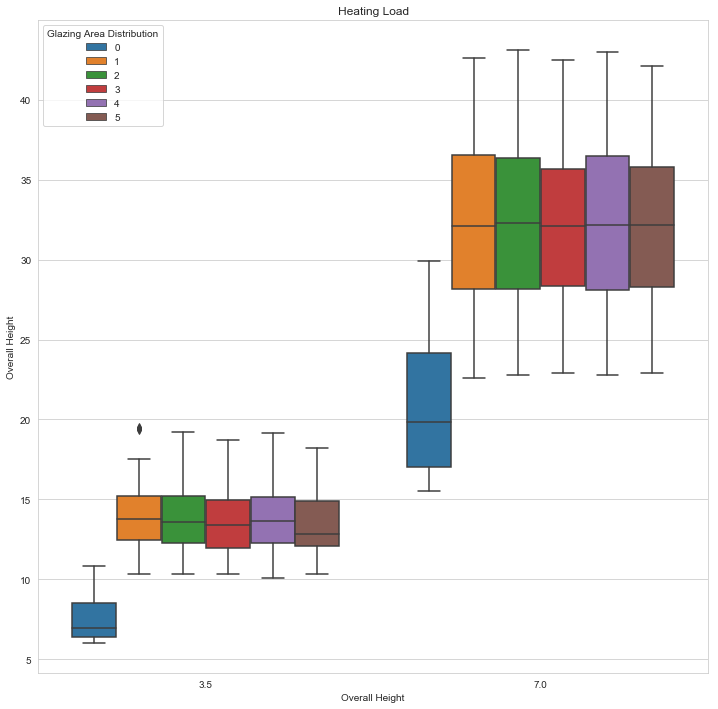

In [37]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Overall Height', y = 'Heating Load', data = buildings, hue = 'Glazing Area Distribution', ax = ax)
ax.set_title('Heating Load') # Give the plot a main title
ax.set_xlabel('Overall Height') # Set text for the x axis
ax.set_ylabel('Overall Height')# Set text for y axis

Text(0, 0.5, 'Overall Height')

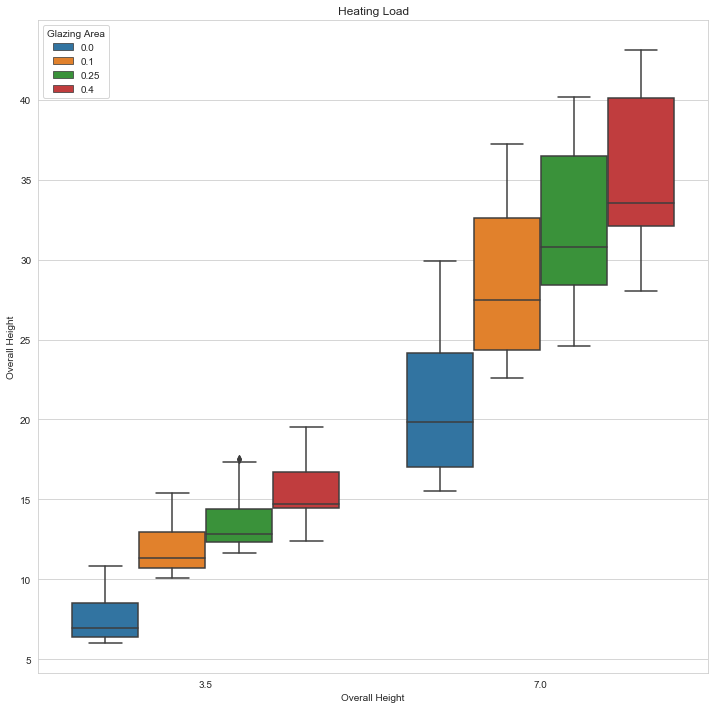

In [38]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.boxplot(x = 'Overall Height', y = 'Heating Load', data = buildings, hue = 'Glazing Area', ax = ax)
ax.set_title('Heating Load versus Overall Height colored by Glazing Area') # Give the plot a main title
ax.set_xlabel('Overall Height') # Set text for the x axis
ax.set_ylabel('Overall Height')# Set text for y axis

This suggests that overall height is the major factor in heating load, followed by glazing area. Let's examine a few more variables and make sure nothing is hiding, as the overall height was hiding before.

Text(0, 0.5, 'Heating Load')

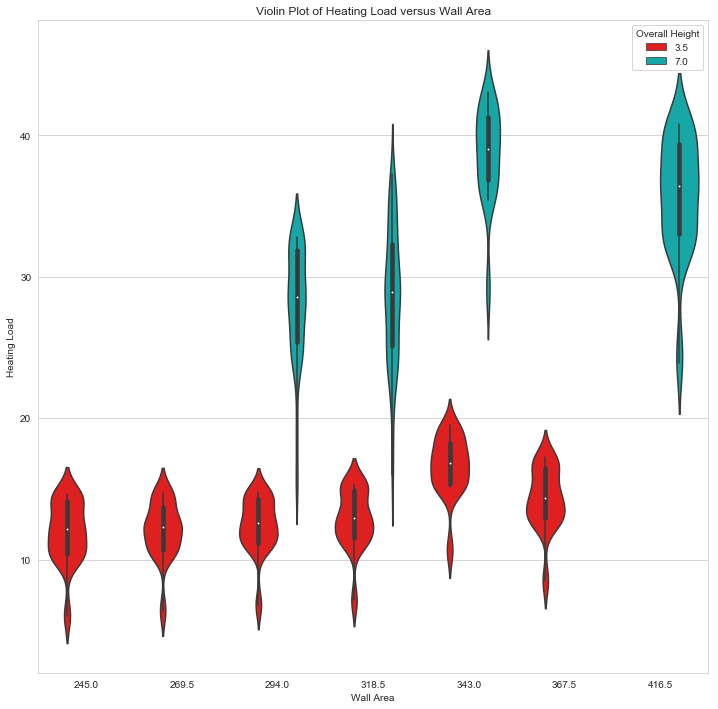

In [41]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x="Wall Area", y="Heating Load", hue="Overall Height",
              palette=["r", "c", "y", "b"], data= buildings)
##sns.violinplot(x = 'Glazing Area',y = 'Heating Load', hue = 'Glazing Area Distribution', data = buildings, ax = ax)
ax.set_title('Violin Plot of Heating Load versus Wall Area colored by overall height') # Give the plot a main title
ax.set_xlabel('Wall Area') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

This says wall area is not important.

Text(0, 0.5, 'Heating Load')

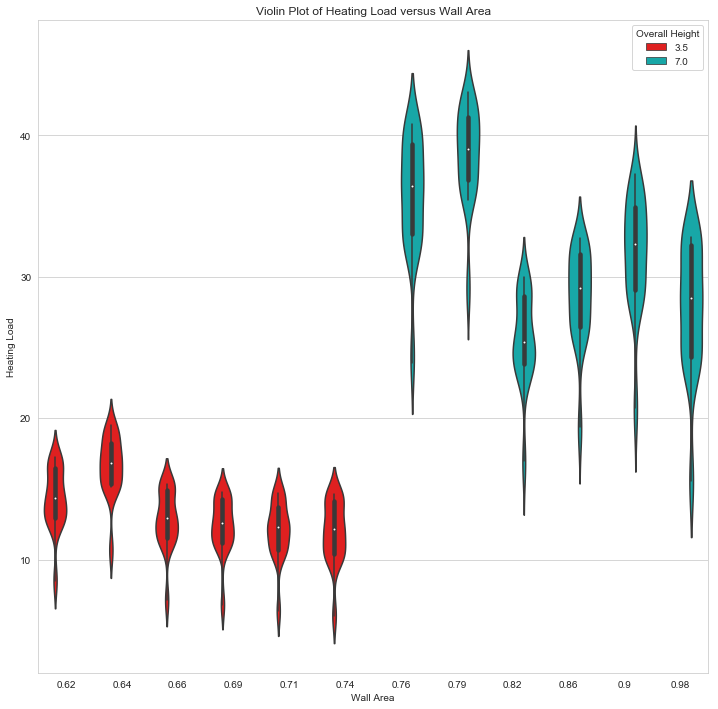

In [43]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x="Relative Compactness", y="Heating Load", hue="Overall Height",
              palette=["r", "c", "y", "b"], data= buildings)
##sns.violinplot(x = 'Glazing Area',y = 'Heating Load', hue = 'Glazing Area Distribution', data = buildings, ax = ax)
ax.set_title('Violin Plot of Heating Load versus Relative Compactness colored by Overall Height') # Give the plot a main title
ax.set_xlabel('Relative Compactness') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

Relative compactness is not as important as height.

Text(0, 0.5, 'Heating Load')

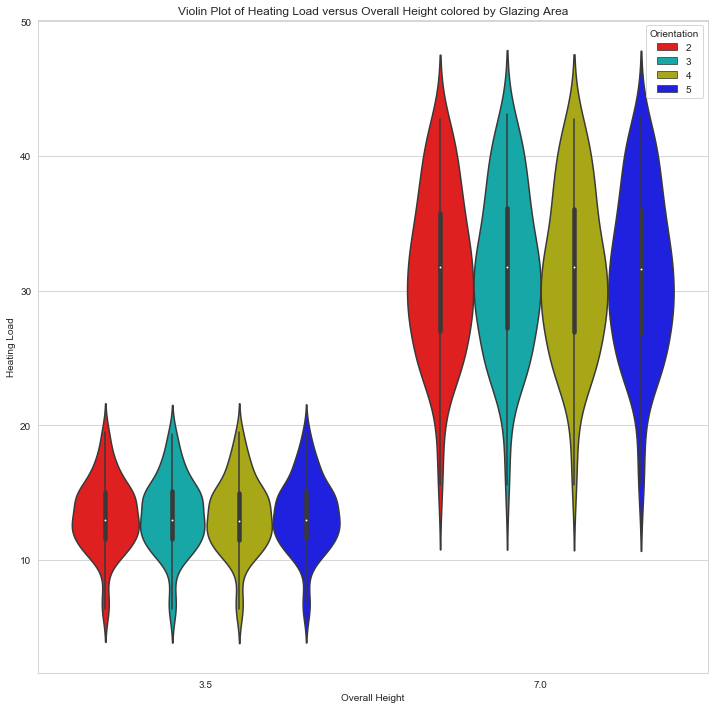

In [44]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x="Overall Height", y="Heating Load", hue="Orientation",
              palette=["r", "c", "y", "b"], data= buildings)
##sns.violinplot(x = 'Glazing Area',y = 'Heating Load', hue = 'Glazing Area Distribution', data = buildings, ax = ax)
ax.set_title('Violin Plot of Heating Load versus Overall Height colored by Glazing Area') # Give the plot a main title
ax.set_xlabel('Overall Height') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

Text(0, 0.5, 'Heating Load')

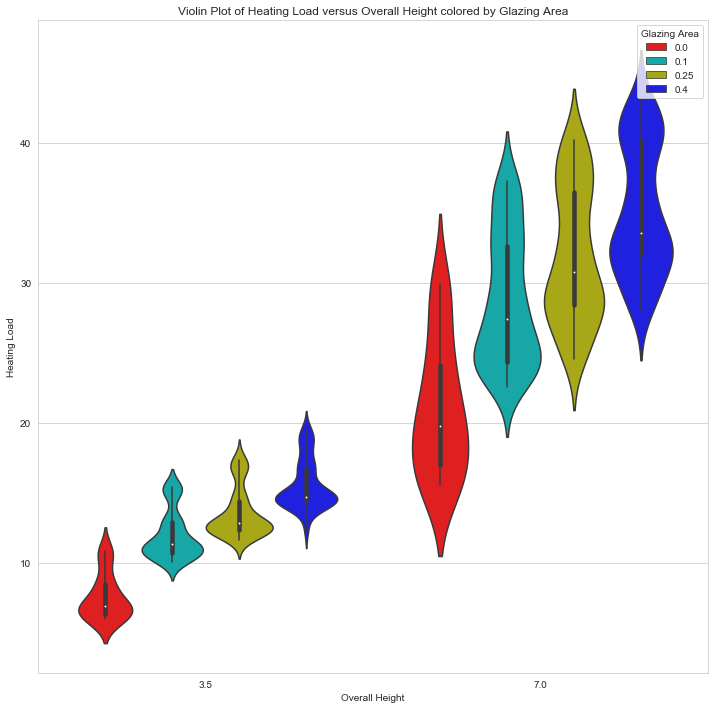

In [54]:
fig = plt.figure(figsize=(12,12)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("whitegrid")
sns.violinplot(x="Overall Height", y="Heating Load", hue="Glazing Area",
              palette=["r", "c", "y", "b"], data= buildings)
ax.set_title('Violin Plot of Heating Load versus Overall Height colored by Glazing Area') # Give the plot a main title
ax.set_xlabel('Overall Height') # Set text for the x axis
ax.set_ylabel('Heating Load')# Set text for y axis

The plot above says that overall height is the major contributor to Heating load, with glazing area also having an effect. The bimodal distribution was a result of the overall heigh having a major impact on the distribution. Relative compactness, orientation, glazing area distribution, wall area, and surface area all had far less impact.